In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scifit.solvers import FitSolver1D

In [2]:
class LaserSolver(FitSolver1D):
    @staticmethod
    def model(x, sp, amp, bg):
        return amp * (x[:, 0]/sp) / (1 + x[:, 0]/sp + (-20/19.6)**2) + bg

In [3]:
# Function for fitting
def scattering_rate(s, sp, amp, bg):
    return amp * (s/sp) / (1 + s/sp + (-20/19.6)**2) + bg

# data
s = np.array([0.6, 1.2, 2.3, 4.3, 8.1, 15.2, 28.5, 53.4])
y = np.array([8.6, 8.5, 8.9, 9.5, 10.6, 12.6, 15.5, 18.3])

In [37]:
popt, pcov = curve_fit(scattering_rate, s, y, absolute_sigma=True)

In [43]:
sy = np.full(y.size, 0.15)

In [44]:
popt, pcov = curve_fit(scattering_rate, s, y, sigma=sy, absolute_sigma=True)

In [45]:
np.sqrt(pcov)

array([[3.25479068, 2.07084837, 0.45391942],
       [2.07084837, 1.35773667, 0.2563505 ],
       [0.45391942, 0.2563505 , 0.09865549]])

In [5]:
solver = LaserSolver()

In [19]:
x = solver.synthetic_dataset(sigma=0.015)

In [20]:
sol = solver.fit(x)

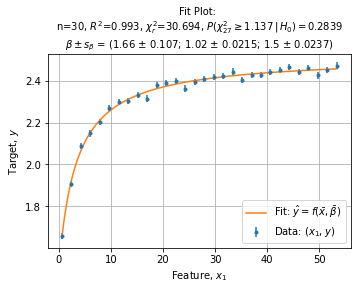

In [21]:
axe = solver.plot_fit()

In [35]:
sol = solver.fit(xdata=s.reshape(-1, 1), ydata=y, sigma=0.15)

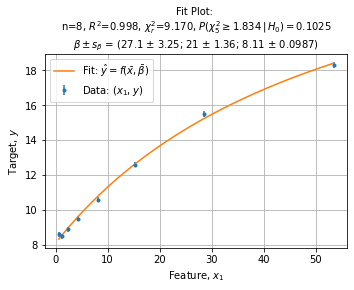

In [46]:
axe = solver.plot_fit()

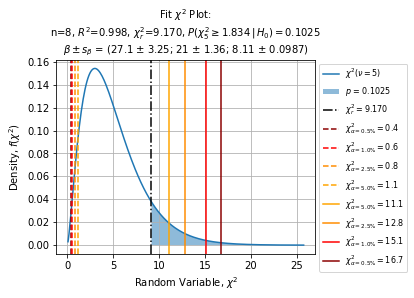

In [48]:
axe = solver.plot_chi_square()

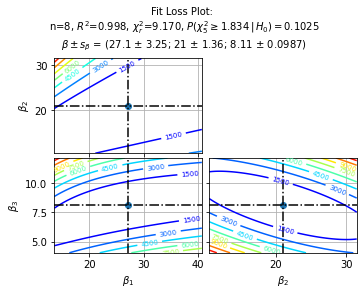

In [49]:
axe = solver.plot_loss()